In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X,y= make_regression(n_samples=1000,n_features=2, n_targets=1,noise=0.3)    #noise means getting outlier

In [3]:
X

array([[-1.82436721, -0.10063945],
       [ 1.24029302,  1.35300069],
       [ 0.73768178, -1.37399337],
       ...,
       [ 1.03439609,  0.10609367],
       [-0.58191201, -0.22721237],
       [-1.12409748, -0.57314736]])

In [4]:
y

array([-4.27279793e+01,  1.55787316e+02, -1.22584670e+02, -1.58927597e+02,
       -3.35594480e+01, -1.25690663e+02, -1.40697935e+02, -1.15919621e+02,
        5.65360561e+01, -9.81997899e+01, -1.45398470e+02, -1.31813012e+02,
       -1.00756125e+02,  1.53203753e+02,  2.75615664e+01,  5.26654558e+01,
        4.03372366e+01,  1.85015605e+02, -1.09680334e+02, -2.51644757e+01,
        2.55453740e+00, -1.13664412e+02,  3.13567029e+02,  1.76168168e-01,
       -8.33899888e+01, -5.68107311e+01, -2.97899760e+02, -5.52678652e+01,
        8.36486350e+01, -1.10318153e+02,  2.67080244e+01,  1.63401346e+01,
       -8.24144695e+01, -2.73705096e+01,  9.17645012e+00,  3.76138452e+01,
       -6.83575279e+01,  1.03858392e+02, -4.52859941e+01, -1.71091104e+02,
       -1.54508828e+02, -1.08403752e+02,  5.15197802e+01, -1.18727031e+02,
       -1.25657217e+02,  2.04369044e+01,  1.14442912e+02, -4.46683508e+01,
        8.68798745e+01,  1.09409550e+02,  1.42219242e+02,  7.43748387e+01,
        1.76430484e+01,  

<Axes: xlabel='0', ylabel='1'>

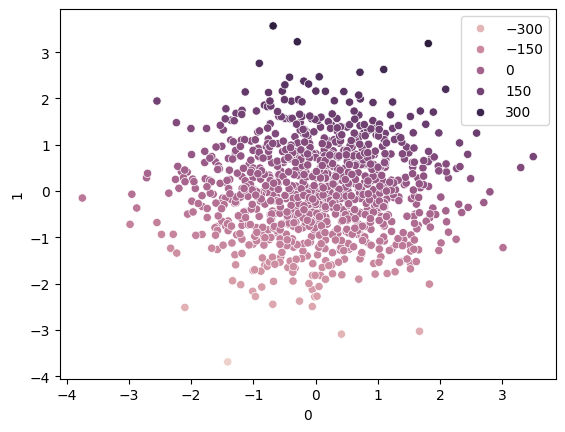

In [5]:
sns.scatterplot(x = pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [7]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [8]:
svr

SVR(kernel='linear')

In [9]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [10]:
y_pred = svr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999888332645683

In [13]:
from sklearn.model_selection import GridSearchCV
params ={
    'C':[1,2,3,4,10, 50, 100],
    'gamma':[0.1,0.2,0.001],
    'kernel':['linear'],
    'epsilon':[0.1,0.001,0.2,0.3]
}

In [14]:
grid = GridSearchCV(SVR(), param_grid=params, cv=5, verbose=3)

In [15]:
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 10, 50, 100],
                         'epsilon': [0.1, 0.001, 0.2, 0.3],
                         'gamma': [0.1, 0.2, 0.001], 'kernel': ['linear']},
             verbose=3)

In [16]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.001, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 10, 50, 100],
                         'epsilon': [0.1, 0.001, 0.2, 0.3],
                         'gamma': [0.1, 0.2, 0.001], 'kernel': ['linear']},
             verbose=3)

In [17]:
grid.best_params_

{'C': 100, 'epsilon': 0.001, 'gamma': 0.1, 'kernel': 'linear'}

In [18]:
grid.best_score_

0.9999906941634258